# Plot curtain

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from typing import Optional
from pathlib import Path
from cartopy.mpl.geoaxes import GeoAxes

In [2]:
def create_fig_2d(grid_int: Optional[int] = 30,
                  grid_int_fine: Optional[int] = None,
                  figsize=(12,12),
                  linewidth=0.5,
                  borders=False,
                  extent=None,
                  projection=ccrs.PlateCarree()):
    """
    Create a 2D figure to add content afterwards.
    :param grid_int: interval (degrees) for major grid lines
    :param grid_int_fine: interfal (degrees) for minor grid lines
    :param figsize: tuple for the figure size in inches (width, height)
    :param linewidth: linewidth of the major grid lines; minor will have half the linewidth
    :param borders: include country borders
    :param projection: cartopy.crs projection to use
    :returns: tuple of figure and axis
    """
    #-- create figure and axes object
    fig = plt.figure(figsize=figsize)
    #-- choose map projection
    ax = plt.axes(projection=projection)
    if not isinstance(ax, GeoAxes): raise TypeError("[510] Creating a figure with GeoAxes failed.")
    #-- add coastlines, country border lines, and grid lines
    ax.coastlines(zorder=1)
    if isinstance(extent, list):
        ax.set_extent([extent[0],
                       extent[1],
                       extent[2],
                       extent[3]])

    #-- create states outlines
    states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                name='admin_1_states_provinces_lines',
                                scale='50m',
                                facecolor='none')

    if borders:
        ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray', zorder=2)
        ax.add_feature(states_provinces, edgecolor='gray', zorder=3)

    if isinstance(grid_int, int):
        ax.gridlines(draw_labels=True,
                    linewidth=linewidth,
                    color='gray',
                    xlocs=range(-180,180,grid_int),
                    ylocs=range(-90,90,grid_int),
                    zorder=4)
    if isinstance(grid_int_fine, int):
        ax.gridlines(draw_labels=True,
                    linewidth=linewidth/2,
                    color='gray',
                    xlocs=range(-180,180,grid_int_fine),
                    ylocs=range(-90,90,grid_int_fine),
                    zorder=4)
    return fig, ax

In [3]:

# %% ------------- INPUT PARAMETERS ------------- ###
# Earthcare file to get lat-lon track from
ec_year = "2024" # format 'YYYY'
ec_month = "08" # format 'MM'
ec_day = "01" # format 'DD'
ec_start_time = "T0008"  # format T'hhmm'
ec_end_time = "T0019"  # format T'hhmm'

ec_start_date = ec_year + ec_month + ec_day + ec_start_time
ec_end_date = ec_year + ec_month + ec_day + ec_end_time
ec_data_path = Path("/work") / "mh0731" / "m301196" / "ecomip"/ "ftp.eorc.jaxa.jp" / "eorc" / "CPR" / "1B" / "xCa" / ec_year / ec_month / ec_day
ec_file = ec_data_path / f"ECA_J_CPR_NOM_1BS_{ec_start_date}_{ec_end_date}_00996H_vCa_corr_xCa.nc"

# (optional) limits to lat-lon range of earthcare path
ec_lon_min = None # degrees
ec_lon_max = None # degrees
ec_lat_min = None # degrees
ec_lat_max = None # degrees

# model, zoom level, and time for curtain dataset
current_location = "EU"
model = "icon_d3hp003"
zoom = 5
model_year = "2020" # format 'YYYY'
model_month = ec_month # format 'MM'
model_day = ec_day # format 'DD'
model_time = ec_start_time  # format T'hhmm'

# curtain_file = curtain_dir / f"ec_curtain_{curtain_label}.zarr"
curtain_dir = Path("/work") / "mh0492" / "m301067" / "hackaton25" / "curtains" / model_year / model_month / model_day
curtain_label = f"{ec_start_date}_{ec_end_date}_{model}_zoom{zoom}"
curtain_file = curtain_dir / f"ec_curtain_{curtain_label}.zarr"

In [4]:
ds = xr.open_dataset(curtain_file)
ds

<xarray.Dataset> Size: 12MB
Dimensions:        (track: 9982, pressure: 30, soil_level: 5, pressure_rva: 3)
Coordinates:
    crs            int64 8B ...
  * pressure       (pressure) int64 240B 5 10 20 50 ... 92500 95000 97500 100000
  * pressure_rva   (pressure_rva) int64 24B 16 18 23
  * soil_level     (soil_level) int64 40B 0 0 0 2 6
    time           datetime64[ns] 8B ...
Dimensions without coordinates: track
Data variables: (12/60)
    clivi          (track) float32 40kB ...
    clt            (track) float32 40kB ...
    clwvi          (track) float32 40kB ...
    egpvi          (track) float32 40kB ...
    einvi          (track) float32 40kB ...
    ekhvi          (track) float32 40kB ...
    ...             ...
    ua             (pressure, track) float32 1MB ...
    uas            (track) float32 40kB ...
    va             (pressure, track) float32 1MB ...
    vas            (track) float32 40kB ...
    wa             (pressure, track) float32 1MB ...
    zg             (pressure, track) float32 1MB ...
Attributes:
    ec_track_date_format:  YYYYMMDDThhmm
    ec_track_end_date:     20240801T0019
    ec_track_start_date:   20240801T0008
    hiopy::parent:         P1D_mean_z6_atm
    model_datetime:        2020-08-01T00:08

In [5]:
ds.track_lon.values

array([45.80033493, 45.7963829 , 45.79243088, ..., 28.50246811,
       28.50118256, 28.50025368], shape=(9982,))

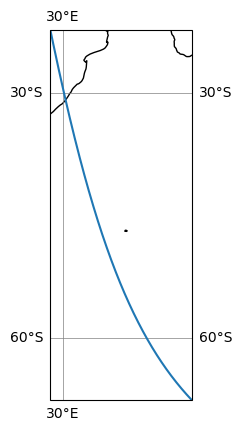

In [6]:
extent = [
    ds.track_lon.min().values,
    ds.track_lon.max().values,
    ds.track_lat.min().values,
    ds.track_lat.max().values
]
fig, ax = create_fig_2d(figsize=None, extent=extent)
plt.plot(ds.track_lon.values, ds.track_lat.values)

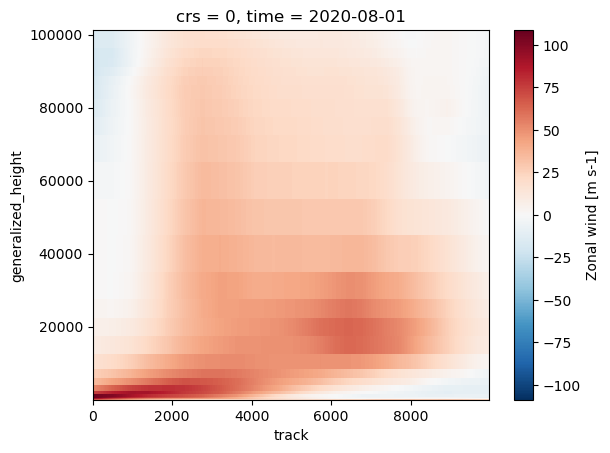

In [7]:
var = 'ua'
ds[var].plot()